In [4]:
from qiskit import *
import qiskit
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
%matplotlib inline

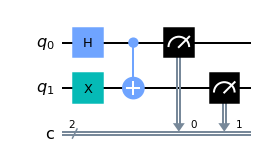

In [5]:
# initialize the quantum circuit with two quibits and two classical bits
circuit = QuantumCircuit(2,2)
# applies the hadamard gate to the quibit 0
circuit.h(0)

circuit.x(1)
circuit.cx(0,1)
# Adds the measurement to the circuit
# and quibit 0 and 1 are to be measured and to be stored in classical bit 0 and 1
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')


In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Create registers
q = QuantumRegister(3)  # 3 qubits
c = ClassicalRegister(2)  # 2 classical bits for measurement

# Create the circuit
circuit = QuantumCircuit(q, c)

# Apply initial gates as described in the image
circuit.h(q[0])  # Hadamard on q0
circuit.x(q[1])  # Pauli-X on q1
circuit.h(q[1])  # Hadamard on q1
circuit.x(q[2])  # Pauli-X on q2
circuit.x(q[2])  # Pauli-X on q2 (again, based on your description)

# Apply CNOT gate to entangle q1 and q2
circuit.cx(q[1], q[2])  # CNOT with q1 as control and q2 as target

# Measure qubits in the suggested order
circuit.measure(q[2], c[0])  # Measure q2 first
circuit.measure(q[1], c[1])  # Measure q1 second

# Draw the circuit
print(circuit.draw())  # Print the text-based representation


      ┌───┐                
q0_0: ┤ H ├────────────────
      ├───┤┌───┐        ┌─┐
q0_1: ┤ X ├┤ H ├──■─────┤M├
      ├───┤├───┤┌─┴─┐┌─┐└╥┘
q0_2: ┤ X ├┤ X ├┤ X ├┤M├─╫─
      └───┘└───┘└───┘└╥┘ ║ 
c0: 2/════════════════╩══╩═
                      0  1 


{'000000101': 1}
{'000000101': 1}
{"000000101": 1}

{"000000101": 1}
"000000101": 1}
000000101


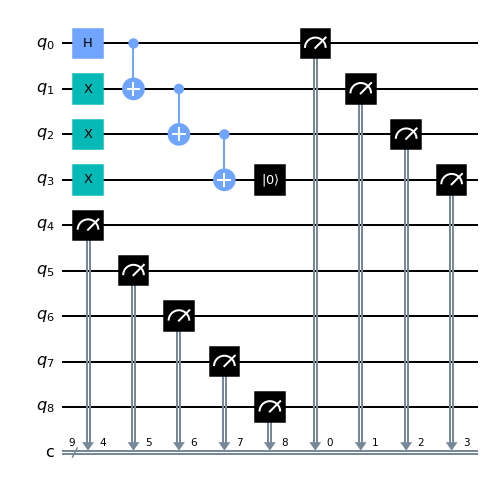

In [6]:
import json
circuit = qiskit.QuantumCircuit(9,9)
simulator = qiskit.Aer.get_backend('qasm_simulator')
circuit.h(0)
circuit.x(1)
circuit.cx(0,1)
circuit.x(2)
circuit.cx(1,2)
circuit.x(3)
circuit.cx(2,3)
circuit.reset(3)
circuit.measure([0,1,2,3,4,5,6,7,8],[0,1,2,3,4,5,6,7,8])
job = qiskit.execute(circuit, simulator, shots=1)
print(job.result().get_counts(circuit))
# Grab results from the job
result = job.result()
print(result.get_counts())

out = json.dumps(result.get_counts()) #Converts the result.get_counts() into a string
print(out)
print()
print(out[:])
print(out[1:])

string = out[2:11] #Removes unnecessary data from string, leaving us with board
print(string)
circuit.draw(output='mpl') 



In [10]:
from termcolor import colored, cprint
import json
from qiskit import *
import qiskit
from qiskit.tools.monitor import job_monitor

import pygame

# Initialize Pygame
pygame.init()

# Constants
WIDTH, HEIGHT = 300, 300
LINE_COLOR = (255, 255, 255)
LINE_WIDTH = 5
GRID_SIZE = 3

# Set up the display window
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("3x3 Grid")

def draw_grid():
    # Draw vertical lines
    for i in range(1, GRID_SIZE):
        pygame.draw.line(screen, LINE_COLOR, (i * WIDTH // GRID_SIZE, 0), (i * WIDTH // GRID_SIZE, HEIGHT), LINE_WIDTH)
    
    # Draw horizontal lines
    for i in range(1, GRID_SIZE):
        pygame.draw.line(screen, LINE_COLOR, (0, i * HEIGHT // GRID_SIZE), (WIDTH, i * HEIGHT // GRID_SIZE), LINE_WIDTH)

def board_coordinates():
    return [[0,0,0] for i in range(3)]


def quanutum_game(circuit,recent_moves):
    first_move = recent_moves[0]
    second_move = recent_moves[1]
    # hamard gate
    circuit.h(first_move[0]*3 + first_move[1])

    # x gate
    circuit.x(second_move[0]*3 + second_move[1])


    print(circuit.draw())
    recent_moves.clear()

    return circuit, recent_moves

    # initialize the hadamard gate hehahah
    # circuit.h()
    # ...

def collapse(circuit):
    simulator = qiskit.Aer.get_backend('qasm_simulator')
    circuit.measure([0,1,2,3,4,5,6,7,8],[0,1,2,3,4,5,6,7,8])
    job = qiskit.execute(circuit, simulator, shots=1)
    result = job.result()
    print(result.get_counts())
    out = json.dumps(result.get_counts()) #Converts the result.get_counts() into a string
    print(out)
    print()
    print(out[:])
    print(out[1:])
    string = out[2:11] #Removes unnecessary data from string, leaving us with board
    print(string)
    circuit.draw(output='mpl') 

    return string


def draw_x_or_y(board_coordinates):
    font = pygame.font.Font('freesansbold.ttf', 60)
    for row in range(3):
        for col in range(3):
            if board_coordinates[row][col] == 1:
                
                # Here True is written to enable smooth edges
                text = font.render("X", True, (255, 0, 0))
                text_rect = text.get_rect(center=(col * WIDTH // GRID_SIZE + WIDTH // GRID_SIZE // 2, row * HEIGHT // GRID_SIZE + HEIGHT // GRID_SIZE // 2))
                screen.blit(text, text_rect)
            elif board_coordinates[row][col] == -1:
                text = font.render("O", True, (0, 0, 255))
                text_rect = text.get_rect(center=(col * WIDTH // GRID_SIZE + WIDTH // GRID_SIZE // 2, row * HEIGHT // GRID_SIZE + HEIGHT // GRID_SIZE // 2))
                screen.blit(text, text_rect)


board_coordinates = board_coordinates()

circuit = qiskit.QuantumCircuit(9,9)

recent_moves = []

# Main loop
running = True
x_turn = True
count = 0
total_count = 0
while running:
    for event in pygame.event.get():

        
        if event.type == pygame.QUIT:
            running = False

        if event.type == pygame.MOUSEBUTTONDOWN:
            mouse_x, mouse_y = pygame.mouse.get_pos()
            cols = mouse_x // (WIDTH // GRID_SIZE)
            rows = mouse_y // (HEIGHT // GRID_SIZE)
            recent_moves.append([rows, cols])
            total_count += 1
                



            if 0 <= rows < GRID_SIZE and 0 <= cols < GRID_SIZE:
            #     if x_turn:
            #         board_coordinates[rows][cols] = 1
            #         x_turn = False
            #     else:
            #         board_coordinates[rows][cols] = -1
            #         x_turn = True

                        # if 0 <= rows < GRID_SIZE and 0 <= cols < GRID_SIZE:
                if x_turn:
                    
                    
                    board_coordinates[rows][cols] = 1
                    
                    count += 1
                    if count == 2:
                        
                        x_turn = False
                        count = 0
                    

                else:
                    board_coordinates[rows][cols] = -1
                    count += 1
                    if count >= 2:
                        
                        x_turn = True
                        count = 0
                
                if len(recent_moves) == 2:
                    quanutum_game(circuit, recent_moves)
            
            if total_count == 9:
                collapse(circuit)
                # running = False

    
    # Clear the screen
    screen.fill((0, 0, 0))
    draw_grid()

    
    # quanutum_game(board_coordinates, circuit, x_turn)
    draw_x_or_y(board_coordinates)
    # print(board_coordinates)

    # Update the display
    pygame.display.flip()

# Quit Pygame
pygame.quit()


     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
          
q_7: ─────
          
q_8: ─────
          
c: 9/═════
          
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
     ┌───┐
q_4: ┤ H ├
     └───┘
q_5: ─────
          
q_6: ─────
          
q_7: ─────
     ┌───┐
q_8: ┤ X ├
     └───┘
c: 9/═════
          
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
     ┌───┐
q_4: ┤ H ├
     └───┘
q_5: ─────
     ┌───┐
q_6: ┤ X ├
     ├───┤
q_7: ┤ H ├
     ├───┤
q_8: ┤ X ├
     └───┘
c: 9/═════
          
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
     ┌───┐
q_3: ┤ H ├
     ├───┤
q_4: ┤ H ├
     ├───┤
q_5: ┤ X ├
     ├───┤
q_6: ┤ X ├
     ├───┤
q_7: ┤ H ├
     ├───┤
q_8: ┤ X ├
     └───┘
c: 9/═════
          
{'101101011': 1}
{"101101011": 1}

{"101101011": 1}
"101101011": 1}
10110101

c:\Users\baral\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
